# Lecture 15: July 28th, 2023

__Today:__

* We made it to the last lecture! Yay!
* I'll host student hours Monday during our normal lecture time.

## Unique Colors

__Goal:__ Figure out how many unique colors are in this image. Then figure out the indices where the colors change.

Last lecture, we were able to write code that told us all the unique colors in the image. Today, we will finish up this section by figuring out the indices where the colors change.

In [5]:
from PIL import  Image
import numpy as np

In [6]:
img = Image.open("images/barbie-grid.png")
arr = np.asarray(img)

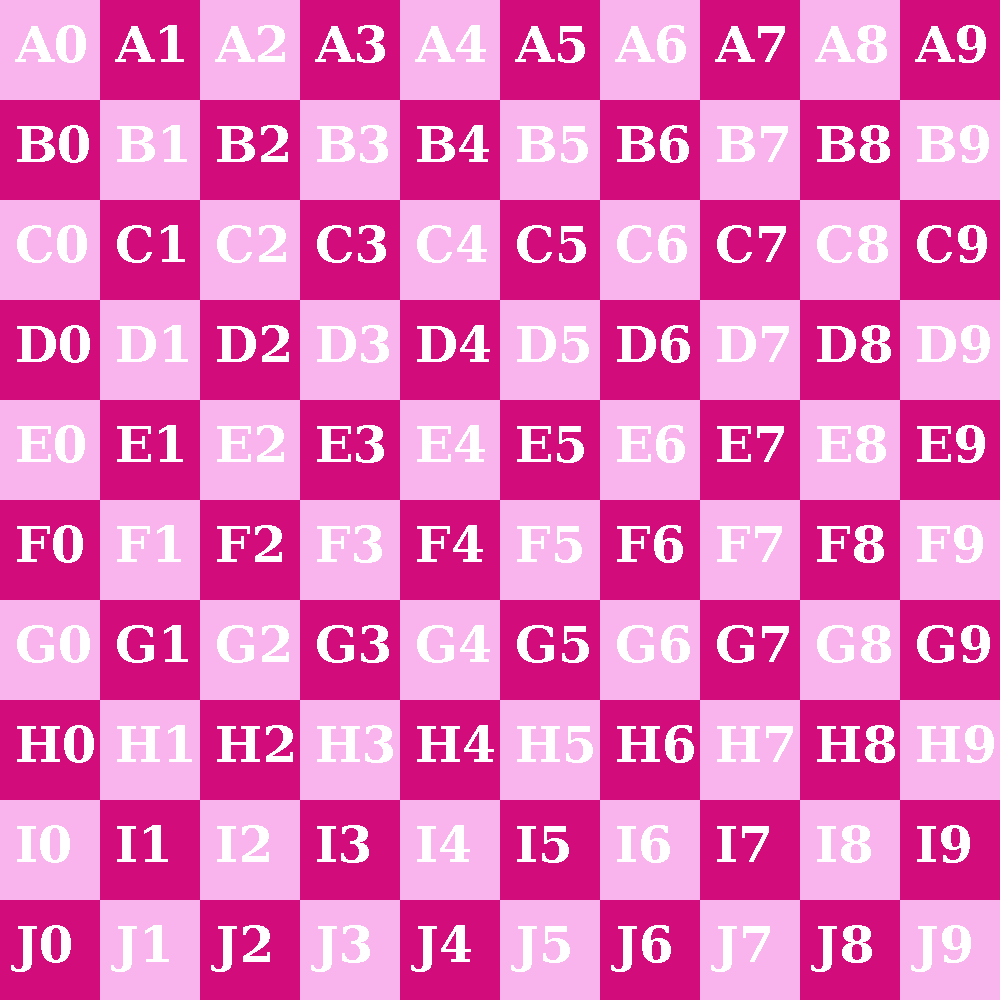

In [7]:
img

As a reminder, here's how we were able to figure out the number of unique colors last time.

In [8]:
B = arr.reshape(-1,3)

In [9]:
np.unique(B,axis=0)

array([[211,  12, 123],
       [249, 180, 237],
       [255, 255, 255]], dtype=uint8)

### Where do the colors change?

Our next focus is to figure out the indices where the color changes from light pink to dark pink. We'll focus only on the first row.

In [17]:
arr[0]

array([[249, 180, 237],
       [249, 180, 237],
       [249, 180, 237],
       ...,
       [211,  12, 123],
       [211,  12, 123],
       [211,  12, 123]], dtype=uint8)

The shape of `arr[0]` is `(1000,3)` because there are 1000 columns in `arr`.

In [19]:
arr[0].shape

(1000, 3)

In [20]:
#this is the dark pink color
arr[0] == [211,  12, 123]

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       ...,
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

What I really want is to return True or False for an entire row. This should make you think of the `axis` keyword argument. We'll also use `all`.

In [22]:
BM = (arr[0] == [211,  12, 123]).all(axis=1)

In [23]:
BM.shape

(1000,)

Now, let's check the indices where `BM` returns true. Remember, `np.zero` returns a tuple. So we take the first element.

In [26]:
inds = np.nonzero(BM)[0]

In [27]:
inds

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 300, 301, 302, 303,
       304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316,
       317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329,
       330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342,
       343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355,
       356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368,
       369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 38

How do we get just the indices where the color changes? It's not too bad...

In [28]:
[x for x in inds if x-1 not in inds]

[100, 300, 500, 700, 900]

These are the indices where the color changes from light pink to dark pink.

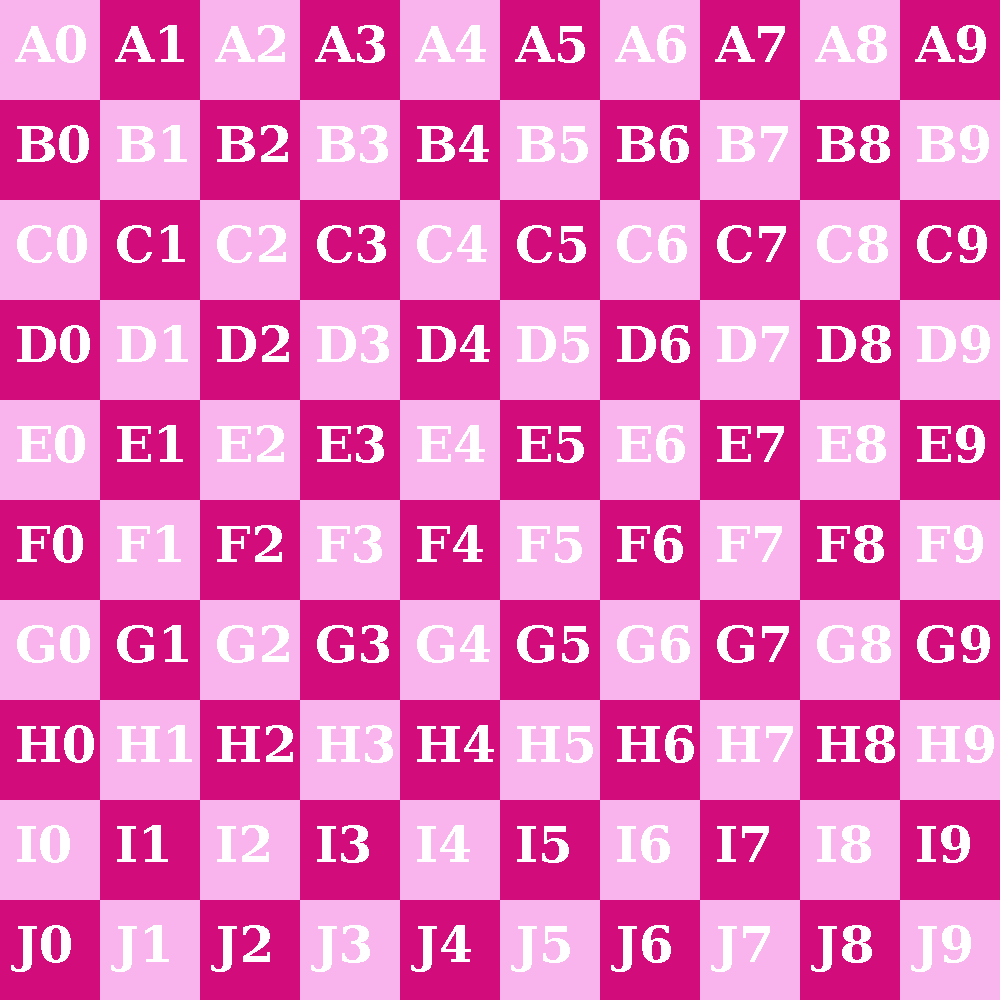

In [29]:
img

## Changing colors using a boolean mask

__Goal:__ Replace all [255,255,255] RGB triples with [46, 41, 78] using a boolean mask. This is going to change the color of the text from white to a different color.

In [30]:
#space cadet
new_color = [46, 41, 78]

Before we actually change the colors, I want to do a few practice examples.

In [31]:
A = np.array([9,2,4,5,1,1,1,0,2,10,5,8])

In [32]:
A.shape

(12,)

The code below returns a boolean array with True everywhere the corresponding element of `A` is greater than 5.

In [33]:
A > 5

array([ True, False, False, False, False, False, False, False, False,
        True, False,  True])

Next, let's just keep the elements of `A` that are greater than 5.

In [34]:
A[A > 5]

array([ 9, 10,  8])

Let's now extend these ideas to three dimensions. This will allow us to practice with a situation that's very close to our image.

In [35]:
B = A.reshape((2,3,2))

In [36]:
B

array([[[ 9,  2],
        [ 4,  5],
        [ 1,  1]],

       [[ 1,  0],
        [ 2, 10],
        [ 5,  8]]])

In [37]:
B.sum(axis=2)

array([[11,  9,  2],
       [ 1, 12, 13]])

In [38]:
B.sum(axis=2) > 5

array([[ True,  True, False],
       [False,  True,  True]])

We might be nervous here because the shape of this array is a whole dimension less than `B`.

In [39]:
(B.sum(axis=2) > 5).shape

(2, 3)

In [40]:
B[B.sum(axis=2) > 5]

array([[ 9,  2],
       [ 4,  5],
       [ 2, 10],
       [ 5,  8]])

However, this is where something nice happens...

In [41]:
B

array([[[ 9,  2],
        [ 4,  5],
        [ 1,  1]],

       [[ 1,  0],
        [ 2, 10],
        [ 5,  8]]])

When we do this assignment, the old shape of `B` is maintained.

In [42]:
B[B.sum(axis=2) > 5] = [-4,-5]

In [43]:
B

array([[[-4, -5],
        [-4, -5],
        [ 1,  1]],

       [[ 1,  0],
        [-4, -5],
        [-4, -5]]])

Now, let's actually change the text color in our image!

In [45]:
arr[(arr == [255,255,255]).all(axis=2)]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [46]:
arr[(arr == [255,255,255]).all(axis=2)].shape

(112790, 3)

Remember, this will cause a mistake because `arr` is "read-only". If we make a copy, things will work out :)

In [47]:
arr[(arr == [255,255,255]).all(axis=2)] = new_color

ValueError: assignment destination is read-only

In [48]:
C = arr.copy()

In [49]:
C[(C == [255,255,255]).all(axis=2)] = new_color

Now, we just want to look at the image!

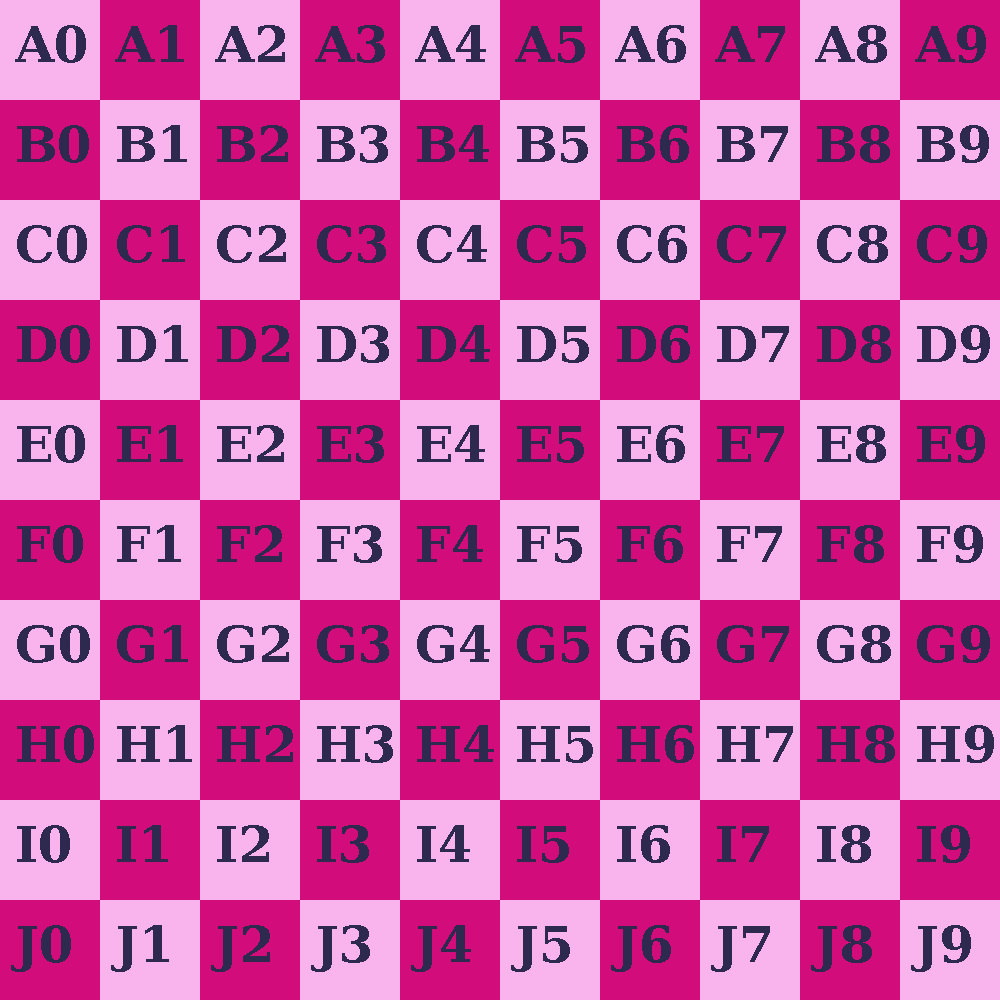

In [50]:
Image.fromarray(C)

## Changing colors using `np.where`

__Goal:__ Replace square backgrounds with random colors.

We'll see in this section that using `np.where` is a lot more powerful than using a boolean mask. We'll be able to accomplish a lot more with fewer lines of code.

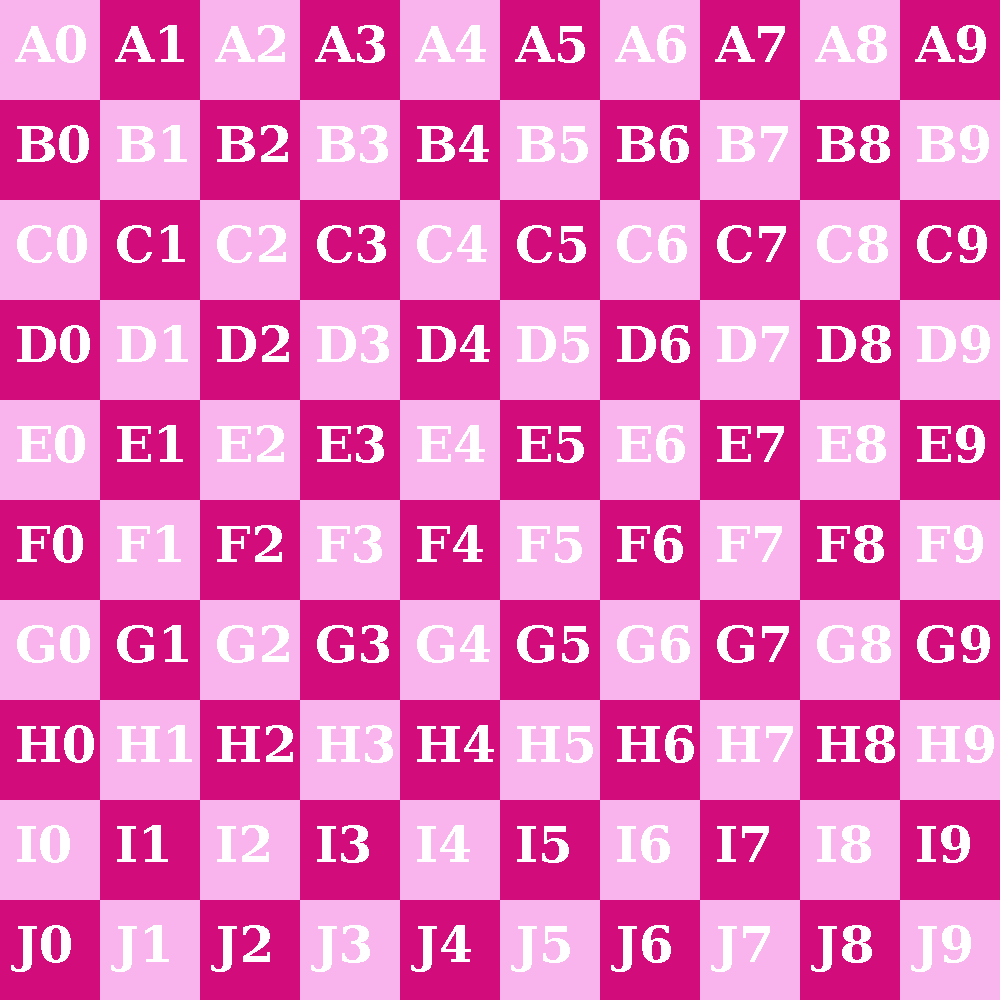

In [51]:
img

To learn the syntax of `np.where`, we'll start with an easier example.

In [52]:
A = np.array([9,2,4,5,1,1,1,0,2,10,5,8])

In [53]:
np.where(A > 5,-20,3)

array([-20,   3,   3,   3,   3,   3,   3,   3,   3, -20,   3, -20])

What does this mean?
* The first argument tells me the condition to check. Here, we are checking if A > 5
* The second argument tells me what to do if the condition is true. Here, if A > 5, then we set the corresponding element to -20.
* The third argument tells me what to do it the condition is false. Here, if A is not greater than 5, then we set the corresponding element to 3.

Notice, the values we put for the True and False arguments work so long as the shape is broadcastable to the dimensions of A.

In [54]:
np.where(A > 5, 100*A, 3)

array([ 900,    3,    3,    3,    3,    3,    3,    3,    3, 1000,    3,
        800])

In [55]:
A

array([ 9,  2,  4,  5,  1,  1,  1,  0,  2, 10,  5,  8])

In [56]:
100*A

array([ 900,  200,  400,  500,  100,  100,  100,    0,  200, 1000,  500,
        800])

In [57]:
np.where(A > 5, 100*A, np.arange(len(A)))

array([ 900,    1,    2,    3,    4,    5,    6,    7,    8, 1000,   10,
        800])

In [58]:
np.arange(len(A))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

***

The following mask tells us where the image is white (this is the text, in our case).

In [60]:
mask = (arr == [255,255,255]).all(axis=2)

Like usual, the following will have a mistake we need to fix.

In [61]:
#keep everything the same
#we're just testing syntax here
np.where(mask,arr,arr)

ValueError: operands could not be broadcast together with shapes (1000,1000) (1000,1000,3) (1000,1000,3) 

The dimensions of our mask are too small. We need to reshape so that it's broadcastable to the entire array.

In [63]:
mask.shape

(1000, 1000)

In [65]:
mask = mask.reshape((1000,1000,1))

In [68]:
#Not changing anything, but code looks good!
#runs without error
np.where(mask, arr, arr)

array([[[249, 180, 237],
        [249, 180, 237],
        [249, 180, 237],
        ...,
        [211,  12, 123],
        [211,  12, 123],
        [211,  12, 123]],

       [[249, 180, 237],
        [249, 180, 237],
        [249, 180, 237],
        ...,
        [211,  12, 123],
        [211,  12, 123],
        [211,  12, 123]],

       [[249, 180, 237],
        [249, 180, 237],
        [249, 180, 237],
        ...,
        [211,  12, 123],
        [211,  12, 123],
        [211,  12, 123]],

       ...,

       [[211,  12, 123],
        [211,  12, 123],
        [211,  12, 123],
        ...,
        [249, 180, 237],
        [249, 180, 237],
        [249, 180, 237]],

       [[211,  12, 123],
        [211,  12, 123],
        [211,  12, 123],
        ...,
        [249, 180, 237],
        [249, 180, 237],
        [249, 180, 237]],

       [[211,  12, 123],
        [211,  12, 123],
        [211,  12, 123],
        ...,
        [249, 180, 237],
        [249, 180, 237],
        [249, 180, 237]]

Now! Let's get our random colors.

In [69]:
rng = np.random.default_rng()

Recall that the RGB values range between 0 and 255.

In our original image, we have a 10 by 10 grid. So, I want a 10 by 10 grid of random colors.

In [88]:
colors = rng.integers(256,size=(10,10,3),dtype=np.uint8)

We'll make another mistake before the code works :)

In [76]:
np.where(mask,arr,colors)

ValueError: operands could not be broadcast together with shapes (1000,1000,1) (1000,1000,3) (10,10,3) 

We need to "stretch" our colors so that they fit into our array. At this point, we've specified 100 colors for our image, but we need to correct the dimensions so that the entire square of color gets changed.

In [89]:
Y = colors.repeat(100,axis=0).repeat(100,axis=1)

In [90]:
#This runs without error!
np.where(mask,arr,Y)

array([[[ 28, 154, 202],
        [ 28, 154, 202],
        [ 28, 154, 202],
        ...,
        [193, 193,  43],
        [193, 193,  43],
        [193, 193,  43]],

       [[ 28, 154, 202],
        [ 28, 154, 202],
        [ 28, 154, 202],
        ...,
        [193, 193,  43],
        [193, 193,  43],
        [193, 193,  43]],

       [[ 28, 154, 202],
        [ 28, 154, 202],
        [ 28, 154, 202],
        ...,
        [193, 193,  43],
        [193, 193,  43],
        [193, 193,  43]],

       ...,

       [[ 64, 184, 158],
        [ 64, 184, 158],
        [ 64, 184, 158],
        ...,
        [162, 154,  51],
        [162, 154,  51],
        [162, 154,  51]],

       [[ 64, 184, 158],
        [ 64, 184, 158],
        [ 64, 184, 158],
        ...,
        [162, 154,  51],
        [162, 154,  51],
        [162, 154,  51]],

       [[ 64, 184, 158],
        [ 64, 184, 158],
        [ 64, 184, 158],
        ...,
        [162, 154,  51],
        [162, 154,  51],
        [162, 154,  51]]

This one is called "The Classic"

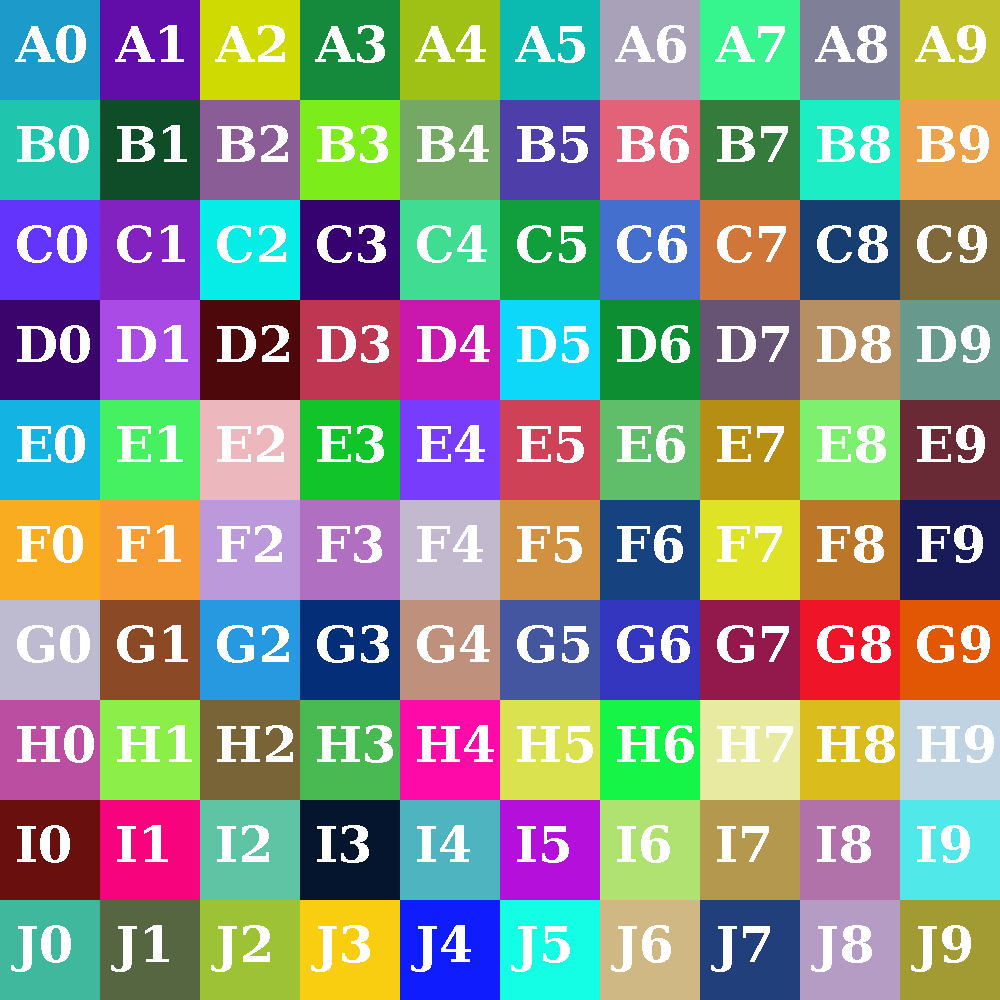

In [91]:
Image.fromarray(np.where(mask,arr,Y))

I call this next one "TV Static"

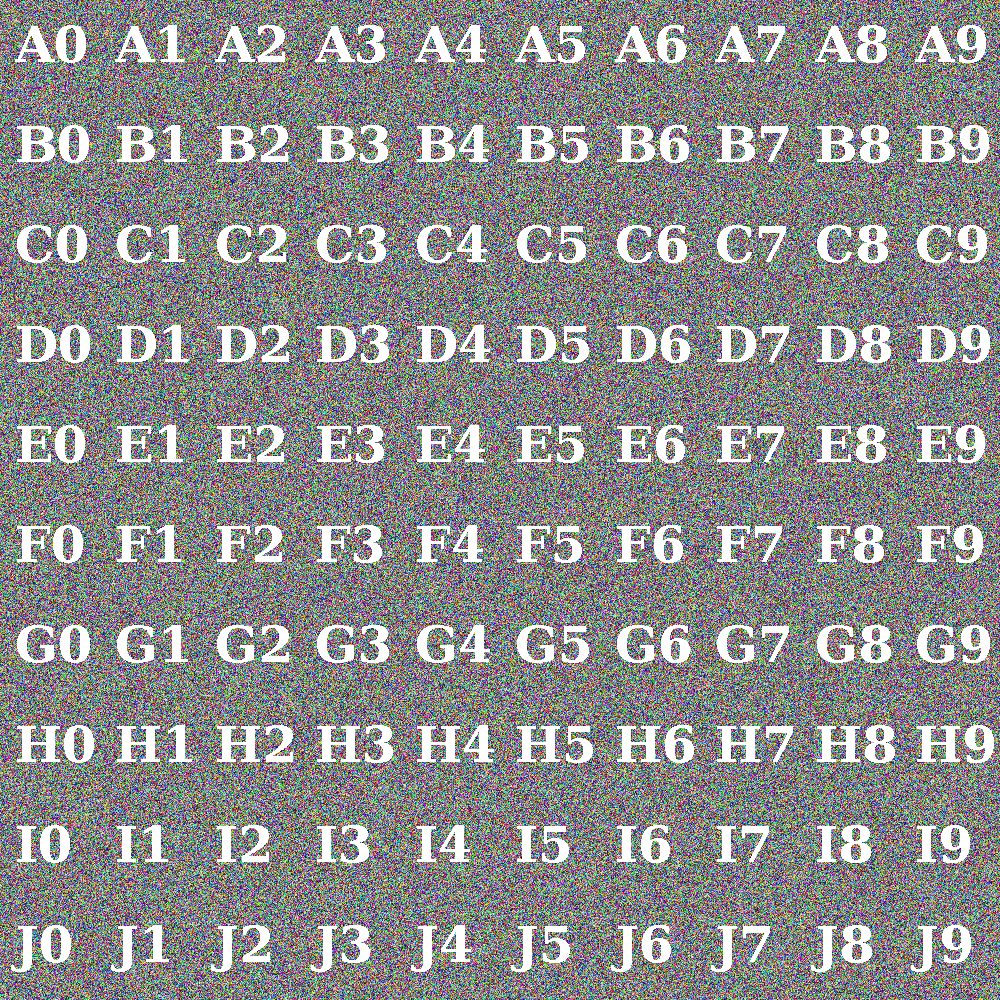

In [94]:
colors2 = rng.integers(256,size=(1000,1000,3),dtype=np.uint8)
Image.fromarray(np.where(mask,arr,colors2))

I call this next one "The Headache"

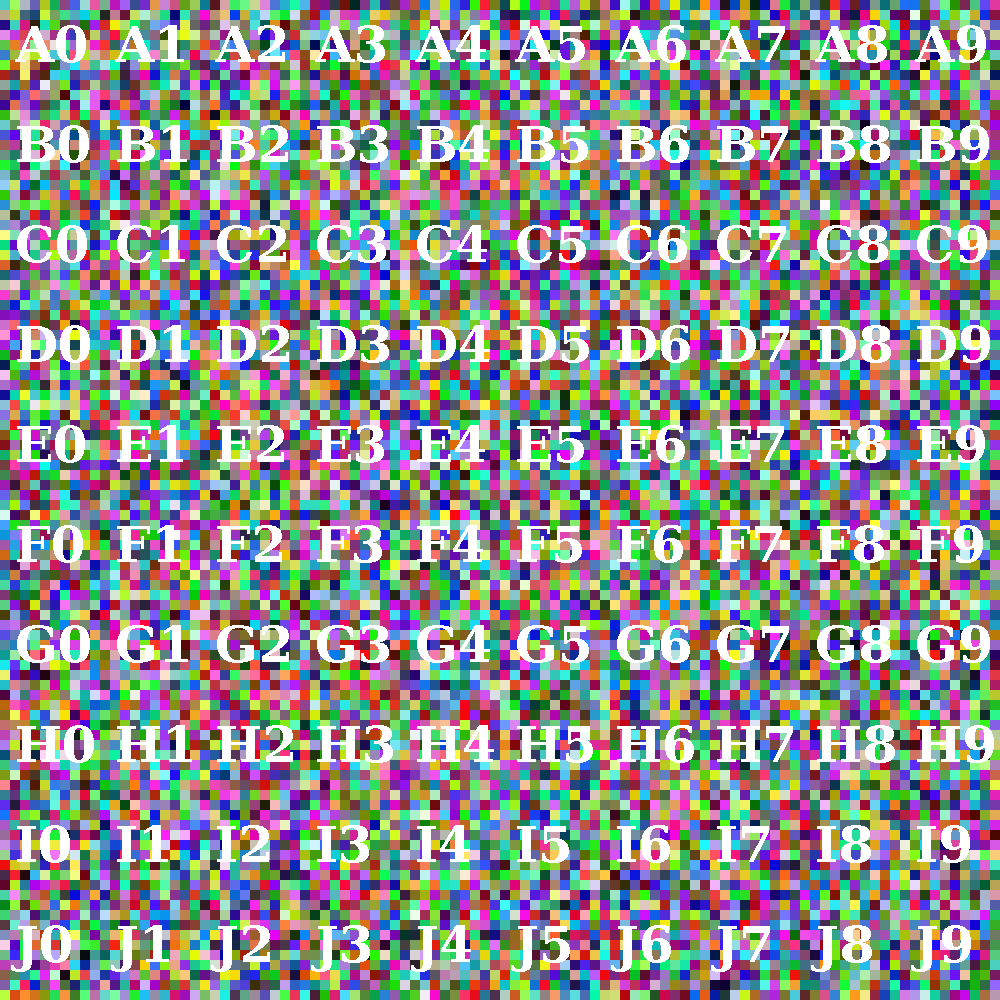

In [96]:
colors3 = rng.integers(256,size=(100,100,3),dtype=np.uint8)
Y = colors3.repeat(10,axis=0).repeat(10,axis=1)
Image.fromarray(np.where(mask,arr,Y))